Capstone 3 - Data Wrangling and Exploratory Data Analysis

Assessing property values is important for a wide range of interests in regard to urban planning, tax assessments, real estate marketing and property transactions. For the past few decades, Los Angeles has been making great strides in realizing a comprehensive plan to extend mass transit system to the metro area. The rapidly evolving system has affected the way we value real estate. But how do the placement of subway stations specifically affect the property values? Does vicinity to green spaces also affect values? As these subway stations come online and NIMBY concerns proliferate, do we see a decline or increase in those properties located near parks and/or subways?  We will use geolocation data from three datasets for our analysis:

Dataset 1: Assessor Parcel Data (Assessor_Parcel_Data_2006_Present.csv) This dataset contains property information, including the target variable Roll_TotalValue (property value) for residential and commercial properites. 

Dataset 2: Los Angeles Subway Locations: https://geohub.lacity.org/datasets/lacounty::metro-stations/explore?location=33.792274%2C-118.295000%2C8.20

Dataset 3: Parks Data: https://egis-lacounty.hub.arcgis.com/datasets/lacounty::countywide-parks-and-open-space-public-hosted/about (Countywide_Parks_and_Open_Space_(Public_-_Hosted).csv) This dataset provides park locations, which are important for understanding how proximity to parks affects property values.

The combined will be preprocessed to include property information, proximity calculations, and categorized distance bands. This data willundergo additional filtering (e.g., limiting to recent years and relevant property types likecommercial and residential).
Exploratory Data Analysis (EDA): Initial visualizations will reveal trends and outliers inproperty value distributions. I will compare the average property values across proximity bandsfor both subway stations and parks.

1. Dataset 1: Assessor Parcel Data (Assessor_Parcel_Data_2006_Present.csv)
This dataset contains property information, including the target variable Roll_TotalValue (property value). We'll focus on the most relevant columns for property characteristics.

In [3]:
import pandas as pd

# Load the dataset
file_path = 'Assessor_Parcel_Data_2006_Present.csv'
df_property = pd.read_csv(file_path, encoding='ISO-8859-1', sep='\t', on_bad_lines='skip', dtype=str)

# Inspect the first few rows
df_property.head()

# Check the column names to understand what is available
df_property.columns

Index(['SitusZIP', 'TaxRateArea_CITY', 'AIN', 'RollYear', 'TaxRateArea',
       'AssessorID', 'PropertyLocation', 'UseType', 'UseCode',
       'UseCodeDescChar1', 'UseCodeDescChar2', 'UseCodeDescChar3',
       'UseCodeDescChar4', 'totBuildingDataLines', 'YearBuilt',
       'EffectiveYearBuilt', 'SQFTmain', 'Bedrooms', 'Bathrooms', 'Units',
       'RecordingDate', 'Roll_LandValue', 'Roll_LandBaseYear', 'Roll_ImpValue',
       'Roll_ImpBaseYear', 'Roll_totLandImp', 'Roll_HomeOwnersExemp',
       'Roll_RealEstateExemp', 'Roll_FixtureValue', 'Roll_FixtureExemp',
       'Roll_PersPropValue', 'Roll_PersPropExemp', 'isTaxableParcel',
       'Roll_TotalValue', 'Roll_TotalExemption', 'netTaxableValue',
       'ParcelClassification', 'AdminRegion', 'Cluster',
       'ParcelBoundaryDescription', 'SitusHouseNo', 'SitusFraction',
       'SitusDirection', 'SitusStreet', 'SitusUnit', 'SitusCity', 'SitusZIP5',
       'rowID', 'CENTER_LAT', 'CENTER_LON'],
      dtype='object')

In [5]:
df_property.head()


,SitusZIP,TaxRateArea_CITY,AIN,RollYear,TaxRateArea,AssessorID,PropertyLocation,UseType,UseCode,UseCodeDescChar1,...,SitusHouseNo,SitusFraction,SitusDirection,SitusStreet,SitusUnit,SitusCity,SitusZIP5,rowID,CENTER_LAT,CENTER_LON
0,91304-3327,LOS ANGELES,2004001003,2006,00016,2004-001-003,8321 FAUST AVE LOS ANGELES CA 91304,SFR,0101,Residential,...,8321,,,FAUST AVE,,LOS ANGELES CA,91304,20062004001003,34.22021979,-118.62066881
1,91304-3327,LOS ANGELES,2004001003,2007,00016,2004-001-003,8321 FAUST AVE LOS ANGELES CA 91304,SFR,0101,Residential,...,8321,,,FAUST AVE,,LOS ANGELES CA,91304,20072004001003,34.22021979,-118.62066881
2,91304-3327,LOS ANGELES,2004001003,2008,00016,2004-001-003,8321 FAUST AVE LOS ANGELES CA 91304,SFR,0101,Residential,...,8321,,,FAUST AVE,,LOS ANGELES CA,91304,20082004001003,34.22021979,-118.62066881
3,91304-3327,LOS ANGELES,2004001003,2009,00016,2004-001-003,8321 FAUST AVE LOS ANGELES CA 91304,SFR,0101,Residential,...,8321,,,FAUST AVE,,LOS ANGELES CA,91304,20092004001003,34.22021979,-118.62066881
4,91304-3327,LOS ANGELES,2004001003,2010,00016,2004-001-003,8321 FAUST AVE LOS ANGELES CA 91304,SFR,0101,Residential,...,8321,,,FAUST AVE,,LOS ANGELES CA,91304,20102004001003,34.22021979,-118.62066881


FILTER DATA TO LATEST YEAR 

In [9]:
# F ind the most recent year
latest_year = df_property['RollYear'].max()

# Filter the dataset for the most recent year
df_property_latest = df_property[df_property['RollYear'] == latest_year]

# Check the shape of the filtered dataset
print(df_property_latest.shape)

# Check the first few rows
df_property_latest.head()


(2419711, 50)


,SitusZIP,TaxRateArea_CITY,AIN,RollYear,TaxRateArea,AssessorID,PropertyLocation,UseType,UseCode,UseCodeDescChar1,...,SitusHouseNo,SitusFraction,SitusDirection,SitusStreet,SitusUnit,SitusCity,SitusZIP5,rowID,CENTER_LAT,CENTER_LON
17,91304-3327,LOS ANGELES,2004001003,2023,00016,2004-001-003,8321 FAUST AVE LOS ANGELES CA 91304,SFR,0101,Residential,...,8321,,,FAUST AVE,,LOS ANGELES CA,91304,20232004001003,34.22022464,-118.62068107
35,91304-3327,LOS ANGELES,2004001004,2023,00016,2004-001-004,8313 FAUST AVE LOS ANGELES CA 91304,SFR,0101,Residential,...,8313,,,FAUST AVE,,LOS ANGELES CA,91304,20232004001004,34.22004395,-118.62068057
53,91304-3327,LOS ANGELES,2004001005,2023,00016,2004-001-005,8309 FAUST AVE LOS ANGELES CA 91304,SFR,0100,Residential,...,8309,,,FAUST AVE,,LOS ANGELES CA,91304,20232004001005,34.21986246,-118.62068794
71,91304-3332,LOS ANGELES,2004001008,2023,00016,2004-001-008,8325 MAYNARD AVE LOS ANGELES CA 91304,SFR,0101,Residential,...,8325,,,MAYNARD AVE,,LOS ANGELES CA,91304,20232004001008,34.22033857,-118.62271778
89,91304-3332,LOS ANGELES,2004001009,2023,00016,2004-001-009,8311 MAYNARD AVE LOS ANGELES CA 91304,SFR,0101,Residential,...,8311,,,MAYNARD AVE,,LOS ANGELES CA,91304,20232004001009,34.22032748,-118.62306189


In [11]:
# Serialize the filtered dataset for faster future access
df_property_latest.to_pickle('property_data_latest_year.pkl')

REFINE THE DATASET

In [17]:
# Select relevant columns for your analysis
df_property_latest_filtered = df_property_latest[['RollYear', 'Roll_LandValue', 'Roll_totLandImp', 'CENTER_LAT', 'CENTER_LON', 
                                    'Bedrooms', 'Bathrooms', 'SQFTmain', 'SitusZIP', 'SitusCity', 'UseType', 'UseCode']]

# Convert numerical columns to numeric types using .loc
df_property_latest.loc[:, 'Roll_LandValue'] = pd.to_numeric(df_property_latest['Roll_LandValue'], errors='coerce')
df_property_latest.loc[:, 'Roll_totLandImp'] = pd.to_numeric(df_property_latest['Roll_totLandImp'], errors='coerce')
df_property_latest.loc[:, 'CENTER_LAT'] = pd.to_numeric(df_property_latest['CENTER_LAT'], errors='coerce')
df_property_latest.loc[:, 'CENTER_LON'] = pd.to_numeric(df_property_latest['CENTER_LON'], errors='coerce')


In [19]:
# Serialize the filtered dataset for faster future access (pickle format)
df_property_latest_filtered.to_pickle('property_data_latest_filtered.pkl')

Dataset 2: Parks Data (Countywide_Parks_and_Open_Space_(Public_-_Hosted).csv)
This dataset provides park locations, which are important for understanding how proximity to parks affects property values.

In [21]:
# Load the parks dataset
file_path_parks = 'Countywide_Parks_and_Open_Space_(Public_-_Hosted).csv'
df_parks = pd.read_csv(file_path_parks, encoding='ISO-8859-1')

# Inspect the first few rows
df_parks.head()

# Check the columns
df_parks.columns


Index(['ï»¿OBJECTID', 'UNIT_ID', 'LMS_ID', 'PARK_NAME', 'PARK_LBL',
       'ACCESS_TYP', 'RPT_ACRES', 'GIS_ACRES', 'AGNCY_NAME', 'AGNCY_LEV',
       'AGNCY_TYP', 'AGNCY_WEB', 'MNG_AGENCY', 'COGP_TYP', 'NDS_AN_TYP',
       'NEEDS_ANLZ', 'TKIT_SUM', 'AMEN_RPT', 'PRKINF_CND', 'AM_OPNSP',
       'AM_TRLS', 'TRLS_MI', 'TENIS', 'BSKTB', 'BASEB', 'SOCCR', 'MPFLD',
       'FITZN', 'SK8PK', 'PCNIC', 'PLGND', 'POOLS', 'SPPAD', 'DGPRK', 'GYM',
       'COMCT', 'SNRCT', 'RSTRM', 'TOTAL_GOOD', 'TOTAL_FAIR', 'TOTAL_POOR',
       'TYPE', 'CENTER_LAT', 'CENTER_LON', 'ADDRESS', 'CITY', 'ZIP', 'HOURS',
       'PHONES', 'IS_COUNTY', 'Shape__Area', 'Shape__Length'],
      dtype='object')

CREATE FILTERED COPY OF PARKS

In [23]:
# Create a filtered copy of the parks DataFrame to avoid the warning
df_parks_filtered = df_parks[['PARK_NAME', 'CENTER_LAT', 'CENTER_LON', 'ADDRESS', 'CITY', 'ZIP']].copy()

# Convert latitude and longitude to numeric types
df_parks_filtered['CENTER_LAT'] = pd.to_numeric(df_parks_filtered['CENTER_LAT'], errors='coerce')
df_parks_filtered['CENTER_LON'] = pd.to_numeric(df_parks_filtered['CENTER_LON'], errors='coerce')

# Display the first few rows to confirm the changes
df_parks_filtered.head()


,PARK_NAME,CENTER_LAT,CENTER_LON,ADDRESS,CITY,ZIP
0,El Barrio Park,34.097081,-117.704423,400 Claremont Blvd,Claremont,91711.0
1,El Dorado Park,34.691578,-118.122109,44501 5th St E,Lancaster,93535.0
2,Atlantic Avenue Park,34.025304,-118.155201,570 S. Atlantic Blvd.,Los Angeles,90022.0
3,El Escorpion Park,34.196742,-118.664169,6801 Sunset Ridge Ct,West Hills,91307.0
4,El Marino Park/ El Marino Elementary,33.992516,-118.399233,11450 Port Rd,Culver City,90230.0


In [25]:
# Serialize the filtered parks dataset as a pickle file
df_parks_filtered.to_pickle('parks_data_filtered.pkl')

<Axes: xlabel='CITY'>

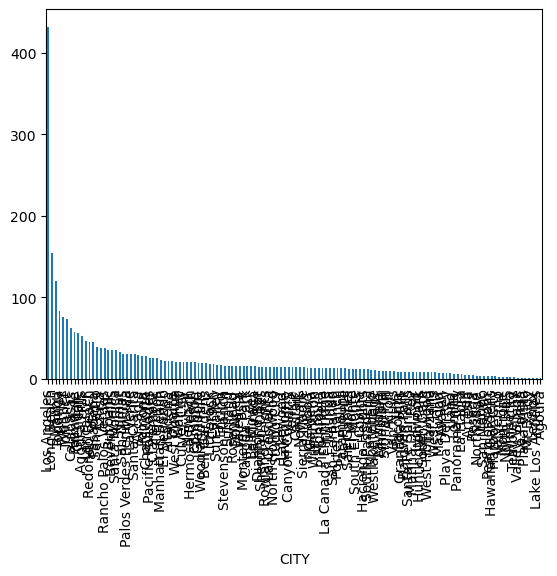

In [27]:
# Count the number of parks in the dataset
df_parks_filtered['PARK_NAME'].nunique()

# Visualize the distribution of parks across cities
df_parks_filtered['CITY'].value_counts().plot(kind='bar')

In [29]:
import pandas as pd

# Load the subway dataset
subway_file_path = 'Metro_Rail_Lines_Stops.csv'
df_subway = pd.read_csv(subway_file_path)

# Inspect the first few rows and columns to understand the data
df_subway.head()

,X,Y,OBJECTID,MetroLine,Station,StopNumber,TOOLTIP,NLA_URL
0,-1.315718e+07,3.997702e+06,1,NaN,Downtown Long Beach Station,80101,Stop: Downtown Long Beach Station\nStop No: 80101,https://www.metro.net/riding/schedules-2/?nla_...
1,-1.315726e+07,3.998263e+06,2,NaN,Pacific Ave Station,80102,Stop: Pacific Ave Station\nStop No: 80102,https://www.metro.net/riding/schedules-2/?nla_...
2,-1.315678e+07,3.999545e+06,3,NaN,Anaheim Street Station,80105,Stop: Anaheim Street Station\nStop No: 80105,https://www.metro.net/riding/schedules-2/?nla_...
3,-1.315678e+07,4.000517e+06,4,NaN,Pacific Coast Hwy Station,80106,Stop: Pacific Coast Hwy Station\nStop No: 80106,https://www.metro.net/riding/schedules-2/?nla_...
4,-1.315683e+07,4.002927e+06,5,NaN,Willow Street Station,80107,Stop: Willow Street Station\nStop No: 80107,https://www.metro.net/riding/schedules-2/?nla_...


Convert X, Y Coordinates to Latitude and Longitude

In [31]:
from pyproj import Transformer
import pandas as pd

# Load the subway dataset
subway_file_path = 'Metro_Rail_Lines_Stops.csv'
df_subway = pd.read_csv(subway_file_path)

# Initialize a transformer to convert from EPSG:3857 (Web Mercator) to EPSG:4326 (latitude/longitude)
transformer = Transformer.from_crs("epsg:3857", "epsg:4326", always_xy=True)

# Convert X, Y to latitude and longitude
df_subway['latitude'], df_subway['longitude'] = transformer.transform(df_subway['X'].values, df_subway['Y'].values)

# Select relevant columns
df_subway_filtered = df_subway[['Station', 'latitude', 'longitude']].copy()

# Swap latitude and longitude columns if necessary
df_subway_filtered['latitude'], df_subway_filtered['longitude'] = df_subway_filtered['longitude'], df_subway_filtered['latitude']

# Display the filtered and converted subway data
print(df_subway_filtered.head())

# Save the filtered data to a CSV file
df_subway_filtered.to_csv('subway_filtered_serialized.csv', index=False)


                       Station   latitude   longitude
0  Downtown Long Beach Station  33.768071 -118.192921
1          Pacific Ave Station  33.772258 -118.193700
2       Anaheim Street Station  33.781830 -118.189384
3    Pacific Coast Hwy Station  33.789090 -118.189382
4        Willow Street Station  33.807079 -118.189834


Serialize our Subway Dataset

In [33]:
df_subway_filtered.to_pickle('subway_data_filtered_converted.pkl')

In [35]:
df_subway_filtered = pd.read_pickle('subway_data_filtered_converted.pkl')

To join the datasets, we'll calculate distances between properties, parks, and subway stations using their latitude and longitude coordinates. This will allow us to analyze the proximity of properties to parks and subway stations and include these distances in your property value prediction model.

Steps to Join the Datasets:
Load the Serialized Datasets: Make sure all the serialized datasets (property, park, and subway) are loaded.

Calculate Distances: We’ll use the Haversine formula to calculate the distance between properties and the nearest park or subway station.

Join the Datasets: After calculating the distances, we'll join these distance values with the property dataset.

Step 1: Load the Serialized Datasets

Create Distance Features
First, we define Haversine function for property distances to parks and subways

In [ ]:
COMPUTE DISTANCES TO SUBWAYS AND SAVE AS COLUMN IN DATASET

In [37]:
!pip install haversine

In [39]:
# Use .loc to avoid SettingWithCopyWarning
df_property_latest_filtered.loc[:, 'CENTER_LAT'] = pd.to_numeric(df_property_latest_filtered['CENTER_LAT'], errors='coerce')
df_property_latest_filtered.loc[:, 'CENTER_LON'] = pd.to_numeric(df_property_latest_filtered['CENTER_LON'], errors='coerce')

df_subway_filtered.loc[:, 'latitude'] = pd.to_numeric(df_subway_filtered['latitude'], errors='coerce')
df_subway_filtered.loc[:, 'longitude'] = pd.to_numeric(df_subway_filtered['longitude'], errors='coerce')


In [43]:
from haversine import haversine, Unit

# Define the function to compute distances to the nearest subway station
def compute_min_distance_to_subways():
    # Assuming df_subways contains subway stations with 'latitude' and 'longitude' columns
    distances = []
    for index, row in df_property_latest_filtered.iterrows():
        property_lat = row['CENTER_LAT']
        property_lon = row['CENTER_LON']
        
        # Calculate the minimum distance to any subway station
        min_distance = df_subways.apply(lambda x: haversine((property_lat, property_lon), (x['latitude'], x['longitude']), unit=Unit.MILES), axis=1).min()
        
        distances.append(min_distance)
    
    return distances


In [49]:
import pandas as pd

# Example: Load subway station data from a CSV file
df_subways = df_subway_filtered

# Ensure the columns 'latitude' and 'longitude' exist
print(df_subways.head())  # Check the structure of the dataset


                       Station   latitude   longitude
0  Downtown Long Beach Station  33.768071 -118.192921
1          Pacific Ave Station  33.772258 -118.193700
2       Anaheim Street Station  33.781830 -118.189384
3    Pacific Coast Hwy Station  33.789090 -118.189382
4        Willow Street Station  33.807079 -118.189834


In [69]:
# Ensure CENTER_LAT and CENTER_LON are numeric
df_property_latest_filtered['CENTER_LAT'] = pd.to_numeric(df_property_latest_filtered['CENTER_LAT'], errors='coerce')
df_property_latest_filtered['CENTER_LON'] = pd.to_numeric(df_property_latest_filtered['CENTER_LON'], errors='coerce')

# Ensure latitude and longitude in df_subway_filtered are numeric
df_subway_filtered['latitude'] = pd.to_numeric(df_subway_filtered['latitude'], errors='coerce')
df_subway_filtered['longitude'] = pd.to_numeric(df_subway_filtered['longitude'], errors='coerce')

# Drop rows with missing or invalid latitude and longitude values
df_property_latest_filtered = df_property_latest_filtered.dropna(subset=['CENTER_LAT', 'CENTER_LON'])
df_subway_filtered = df_subway_filtered.dropna(subset=['latitude', 'longitude'])

# Convert latitude and longitude to radians for the KDTree
property_lat_lon_rad = np.radians(df_property_latest_filtered[['CENTER_LAT', 'CENTER_LON']].values)
subway_lat_lon_rad = np.radians(df_subway_filtered[['latitude', 'longitude']].values)

# Build a KDTree for the subway station coordinates
from scipy.spatial import KDTree
subway_tree = KDTree(subway_lat_lon_rad)

# Query the tree to find the nearest subway station for each property
distances, _ = subway_tree.query(property_lat_lon_rad, distance_upper_bound=np.inf)

# Convert distances from radians to miles (Earth's radius in miles is ~3956)
df_property_latest_filtered['distance_to_subway'] = distances * 3956

# Check the first few rows to ensure the distances were computed
df_property_latest_filtered[['CENTER_LAT', 'CENTER_LON', 'distance_to_subway']].head()

,CENTER_LAT,CENTER_LON,distance_to_subway
17,34.220225,-118.620681,16.703106
35,34.220044,-118.620681,16.692924
53,34.219862,-118.620688,16.683016
71,34.220339,-118.622718,16.791436
89,34.220327,-118.623062,16.804733


In [71]:
# Serialize the updated dataset with subway distances
df_property_latest_filtered.to_pickle('property_with_subway_distances.pkl')

In [73]:
df_property_latest_filtered[['distance_to_subway']].head(10)


,distance_to_subway
17,16.703106
35,16.692924
53,16.683016
71,16.791436
89,16.804733
107,16.797962
125,16.782373
143,16.765705
161,16.752129
179,16.739800


GET DISTANCES TO PARKS & 

In [75]:
import pandas as pd

# Load the filtered parks dataset from the pickle file
df_parks_filtered = pd.read_pickle('parks_data_filtered.pkl')

# Verify the dataset was loaded correctly
df_parks_filtered.head()



,PARK_NAME,CENTER_LAT,CENTER_LON,ADDRESS,CITY,ZIP
0,El Barrio Park,34.097081,-117.704423,400 Claremont Blvd,Claremont,91711.0
1,El Dorado Park,34.691578,-118.122109,44501 5th St E,Lancaster,93535.0
2,Atlantic Avenue Park,34.025304,-118.155201,570 S. Atlantic Blvd.,Los Angeles,90022.0
3,El Escorpion Park,34.196742,-118.664169,6801 Sunset Ridge Ct,West Hills,91307.0
4,El Marino Park/ El Marino Elementary,33.992516,-118.399233,11450 Port Rd,Culver City,90230.0


In [ ]:
import pandas as pd

# Load the most recent property dataset
df_property_latest_filtered = pd.read_pickle('property_data_latest_filtered.pkl')

# Verify the dataset was loaded correctly
df_property_latest_filtered.head()


In [ ]:
pip install joblib

In [77]:
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

# Load your dataset that already contains subway distances
df_property_latest_filtered = pd.read_pickle('property_with_subway_distances.pkl')
df_parks_filtered = pd.read_pickle('parks_data_filtered.pkl')

# Convert necessary columns to numeric
df_property_latest_filtered['CENTER_LAT'] = pd.to_numeric(df_property_latest_filtered['CENTER_LAT'], errors='coerce')
df_property_latest_filtered['CENTER_LON'] = pd.to_numeric(df_property_latest_filtered['CENTER_LON'], errors='coerce')
df_parks_filtered['CENTER_LAT'] = pd.to_numeric(df_parks_filtered['CENTER_LAT'], errors='coerce')
df_parks_filtered['CENTER_LON'] = pd.to_numeric(df_parks_filtered['CENTER_LON'], errors='coerce')

# Create arrays for park lat/lon
park_lats = np.radians(df_parks_filtered['CENTER_LAT'].values)
park_lons = np.radians(df_parks_filtered['CENTER_LON'].values)

# Function to calculate the distance in batches
def compute_min_distance_to_parks_batch(property_lats, property_lons):
    dlat = property_lats[:, np.newaxis] - park_lats
    dlon = property_lons[:, np.newaxis] - park_lons
    a = np.sin(dlat / 2)**2 + np.cos(property_lats[:, np.newaxis]) * np.cos(park_lats) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distances = 3956 * c  # Earth radius in miles
    return distances.min(axis=1)

# Function to compute distances for each batch in parallel
def process_batch(batch):
    property_lats = np.radians(batch['CENTER_LAT'].values)
    property_lons = np.radians(batch['CENTER_LON'].values)
    return compute_min_distance_to_parks_batch(property_lats, property_lons)

# Define batch size (adjust based on your system's memory capacity)
batch_size = 1000

# Run the calculations in parallel across batches
results = Parallel(n_jobs=-1)(delayed(process_batch)(df_property_latest_filtered.iloc[i:i + batch_size])
                              for i in range(0, len(df_property_latest_filtered), batch_size))

# Flatten the results and store them back in the DataFrame
df_property_latest_filtered['distance_to_park'] = np.concatenate(results)

# Serialize the final dataset with both subway and park distances
df_property_latest_filtered.to_pickle('property_with_subway_and_park_distances.pkl')

# Display the first few rows with both distances
df_property_latest_filtered[['distance_to_park', 'distance_to_subway']].head()


,distance_to_park,distance_to_subway
17,0.285082,16.703106
35,0.295467,16.692924
53,0.306290,16.683016
71,0.358363,16.791436
89,0.374201,16.804733


ASSIGN VALUES FOR VARIOUS DISTANCES OF PROPERTIES FROM SUBWAYS AND PARKS

In [79]:
# Define a function to assign proximity numbers based on distance
def assign_proximity(distance):
    if distance <= 0.25:
        return 1
    elif distance <= 0.50:
        return 2
    elif distance <= 0.75:
        return 3
    elif distance <= 1.00:
        return 4
    elif distance <= 1.25:
        return 5
    elif distance <= 1.50:
        return 6
    elif distance <= 1.75:
        return 7
    elif distance <= 2.00:
        return 8
    else:
        return 9  # For distances greater than 2 miles

# Ensure you're working with the correct dataset
df_property_latest_filtered = pd.read_pickle('property_with_subway_and_park_distances.pkl')

# Assign proximity numbers for parks
df_property_latest_filtered['park_proximity'] = df_property_latest_filtered['distance_to_park'].apply(assign_proximity)

# Assign proximity numbers for subways
df_property_latest_filtered['subway_proximity'] = df_property_latest_filtered['distance_to_subway'].apply(assign_proximity)

# Display the first few rows to verify the new columns
df_property_latest_filtered[['park_proximity', 'subway_proximity']].head()


,park_proximity,subway_proximity
17,2,9
35,2,9
53,2,9
71,2,9
89,2,9


In [81]:
# Save the updated dataset with proximity numbers
df_property_latest_filtered.to_pickle('property_with_proximity_numbers.pkl')

# Display the first few rows to verify
df_property_latest_filtered[['park_proximity', 'subway_proximity']].head(10)

,park_proximity,subway_proximity
17,2,9
35,2,9
53,2,9
71,2,9
89,2,9
107,2,9
125,2,9
143,2,9
161,2,9
179,2,9


In [83]:
# Display a random sample of 10 rows from the DataFrame
df_property_latest_filtered[['park_proximity', 'subway_proximity']].sample(10)


,park_proximity,subway_proximity
29195,1,9
15624999,3,5
2399605,3,9
24442662,3,9
23268708,1,5
10020102,3,9
26286887,3,8
18175970,2,2
37416332,1,9
22445596,2,9


Define the Control Set
We will create a control set of properties that are more than 2 miles from both a park and a subway. This corresponds to park_proximity and subway_proximity being equal to 9.

In [85]:
# Define the control set: properties more than 2 miles away from both parks and subways
control_set = df_property_latest_filtered[(df_property_latest_filtered['park_proximity'] == 9) &
                                          (df_property_latest_filtered['subway_proximity'] == 9)]

# Define the non-control set: properties within 2 miles of either a park or subway
non_control_set = df_property_latest_filtered[(df_property_latest_filtered['park_proximity'] < 9) |
                                              (df_property_latest_filtered['subway_proximity'] < 9)]

# Serialize the control set
control_set.to_pickle('property_control_set.pkl')

# Serialize the non-control set
non_control_set.to_pickle('property_non_control_set.pkl')

# Confirm that the sets were saved
print("Control and non-control sets serialized successfully.")

Control and non-control sets serialized successfully.


In [87]:
# Display the first 10 rows of both control and non-control sets
print("Control Set (First 10 Rows):")
print(control_set.head(10))

print("\nNon-Control Set (First 10 Rows):")
print(non_control_set.head(10))

Control Set (First 10 Rows):
        RollYear Roll_LandValue Roll_totLandImp  CENTER_LAT  CENTER_LON  \
5309446     2023              0               0   34.344302 -118.299874   
5309464     2023              0               0   34.344344 -118.317256   
5309482     2023        1291763         6123884   34.327831 -118.319540   
5309500     2023          22824           24671   34.327121 -118.298510   
5309518     2023              0               0   34.332189 -118.316236   
5309536     2023              0               0   34.332822 -118.300426   
5309554     2023              0               0   34.324366 -118.295354   
5309572     2023              0               0   34.324414 -118.310344   
5309626     2023           5382            5382   34.328064 -118.333492   
5309644     2023         261056          261056   34.324464 -118.327630   

        Bedrooms Bathrooms SQFTmain    SitusZIP             SitusCity UseType  \
5309446        0         0        0                             

In [89]:
# Check for missing values in the distance columns
missing_subway_distances = df_property_latest_filtered['distance_to_subway'].isnull().sum()
missing_park_distances = df_property_latest_filtered['distance_to_park'].isnull().sum()

print(f"Missing values in 'distance_to_subway': {missing_subway_distances}")
print(f"Missing values in 'distance_to_park': {missing_park_distances}")


Missing values in 'distance_to_subway': 0
Missing values in 'distance_to_park': 0


VISUALIZATIONS OF DATA PRIOR TO MODELING

Step 1: Boxplots
We’ll create boxplots to compare property values (Roll_totLandImp) for different proximity levels to parks and subways.
We create samples of the data because it is so large.

In [97]:
# Sample 10% of the data
df_sample = df_property_latest_filtered.sample(frac=0.1, random_state=42)

# Check the size of the sampled data
print(df_sample.shape)


(241706, 16)


In [115]:
# Convert inf and -inf to NaN in the entire dataset
df_property_latest_filtered.replace([np.inf, -np.inf], np.nan, inplace=True)

# You can also drop rows with NaN if appropriate
df_property_latest_filtered.dropna(inplace=True)

In [9]:
import pandas as pd
import warnings

# Ignore future warnings for now
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the data from the pickle file (not CSV)
file_path = 'property_with_proximity_numbers.pkl'
df_property_latest_filtered = pd.read_pickle(file_path)

# Sample 5% of the data for quicker visualization
df_sample = df_property_latest_filtered.sample(frac=0.05, random_state=42)

# Verify the data was loaded correctly
print(df_sample.head())


         RollYear Roll_LandValue Roll_totLandImp  CENTER_LAT  CENTER_LON  \
42316189     2023          81517          181600   34.048180 -117.778513   
31229045     2023         230838          357236   33.870122 -118.181437   
38982198     2023          83455          179453   34.028875 -117.732831   
32312710     2023         344047          430055   33.792784 -118.165800   
31238370     2023          57495          220067   33.878762 -118.171101   

         Bedrooms Bathrooms SQFTmain    SitusZIP       SitusCity UseType  \
42316189        3         1     1627  91766-1107       POMONA CA     SFR   
31229045        4         2     1521  90805-2407   LONG BEACH CA     SFR   
38982198        3         1     1030  91766-6437       POMONA CA     SFR   
32312710        3         2      844  90755-5914  SIGNAL HILL CA     SFR   
31238370        2         3     1285  90805-1685   LONG BEACH CA     CND   

         UseCode  distance_to_subway  distance_to_park  park_proximity  \
42316189    

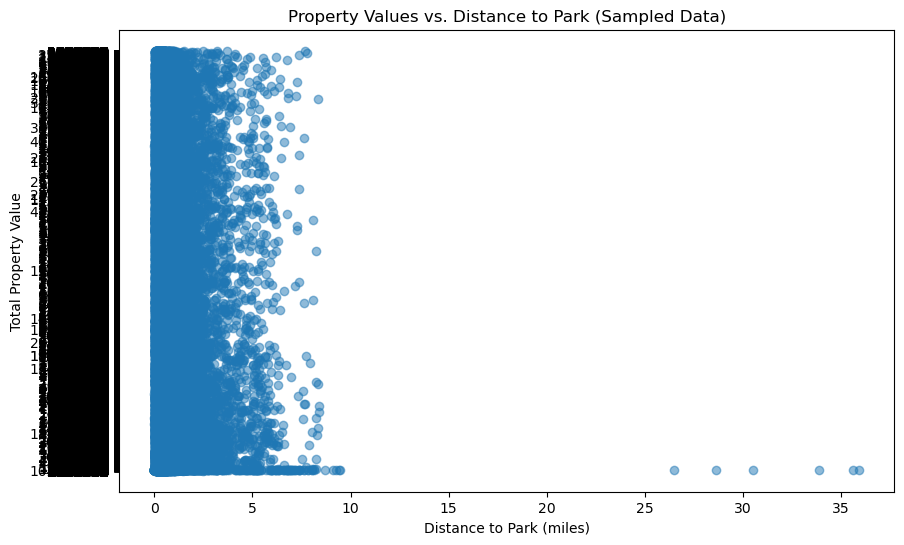

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Simple scatter plot for property values vs. park proximity (sampled data)
plt.figure(figsize=(10, 6))
plt.scatter(df_sample['distance_to_park'], df_sample['Roll_totLandImp'], alpha=0.5)
plt.title('Property Values vs. Distance to Park (Sampled Data)')
plt.xlabel('Distance to Park (miles)')
plt.ylabel('Total Property Value')
plt.show()


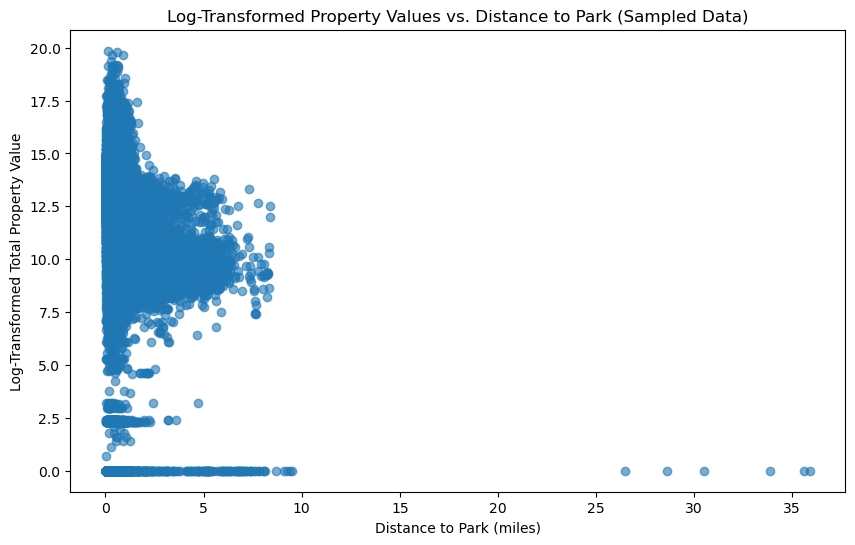

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Roll_totLandImp is converted to numeric
df_sample['Roll_totLandImp'] = pd.to_numeric(df_sample['Roll_totLandImp'], errors='coerce')

# Apply log transformation to property values for better scaling
df_sample['Log_Property_Value'] = np.log1p(df_sample['Roll_totLandImp'])

# Recreate the scatter plot with the transformed values
plt.figure(figsize=(10, 6))
plt.scatter(df_sample['distance_to_park'], df_sample['Log_Property_Value'], alpha=0.6)
plt.title('Log-Transformed Property Values vs. Distance to Park (Sampled Data)')
plt.xlabel('Distance to Park (miles)')
plt.ylabel('Log-Transformed Total Property Value')
plt.show()


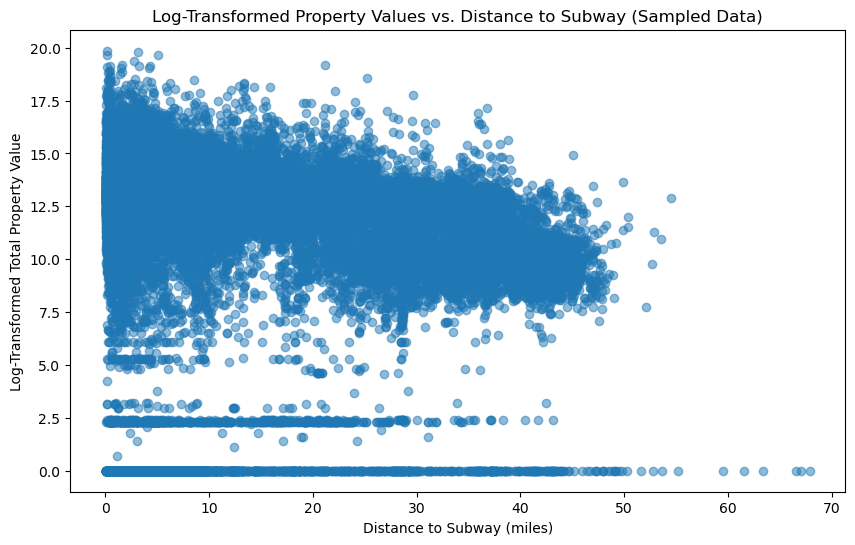

In [17]:
import matplotlib.pyplot as plt

# Recreate the scatter plot for subway proximity with the transformed values
plt.figure(figsize=(10, 6))
plt.scatter(df_sample['distance_to_subway'], df_sample['Log_Property_Value'], alpha=0.5)
plt.title('Log-Transformed Property Values vs. Distance to Subway (Sampled Data)')
plt.xlabel('Distance to Subway (miles)')
plt.ylabel('Log-Transformed Total Property Value')
plt.show()


Interaction Between Subway and Park Proximity

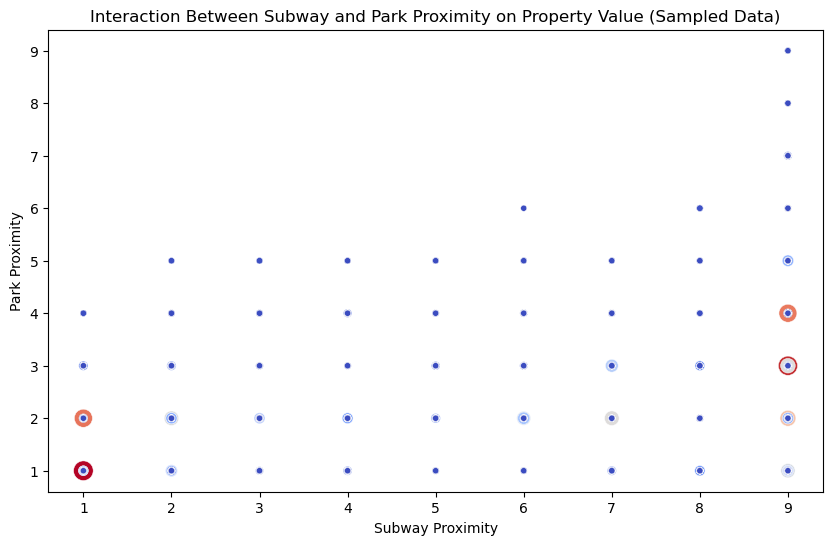

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Interaction plot between subway proximity, park proximity, and property value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subway_proximity', y='park_proximity', size='Roll_totLandImp', sizes=(20, 200), hue='Roll_totLandImp', data=df_sample, palette='coolwarm', legend=False)
plt.title('Interaction Between Subway and Park Proximity on Property Value (Sampled Data)')
plt.xlabel('Subway Proximity')
plt.ylabel('Park Proximity')
plt.show()


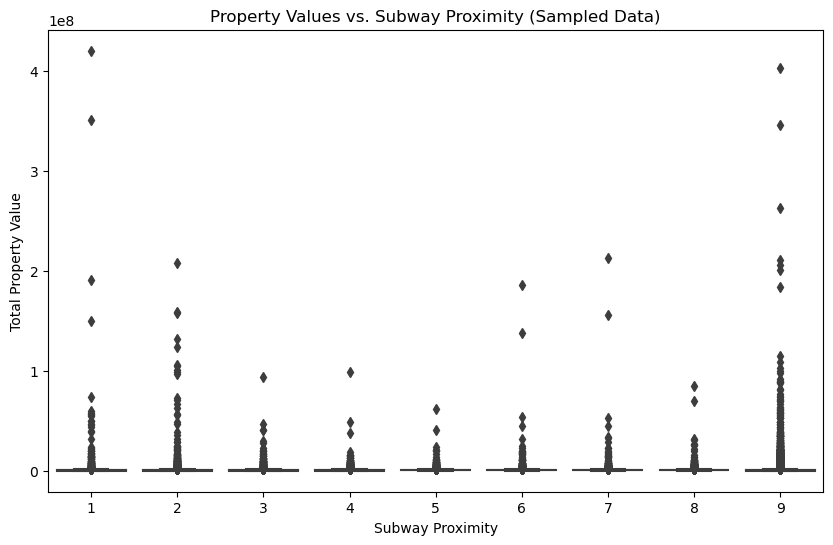

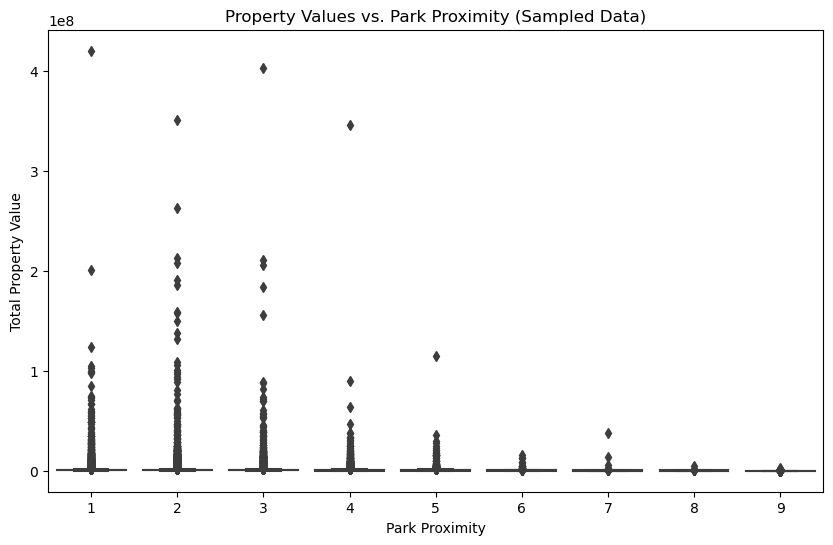

In [21]:
# Boxplot for subway proximity and property values
plt.figure(figsize=(10, 6))
sns.boxplot(x='subway_proximity', y='Roll_totLandImp', data=df_sample)
plt.title('Property Values vs. Subway Proximity (Sampled Data)')
plt.xlabel('Subway Proximity')
plt.ylabel('Total Property Value')
plt.show()

# Boxplot for park proximity and property values
plt.figure(figsize=(10, 6))
sns.boxplot(x='park_proximity', y='Roll_totLandImp', data=df_sample)
plt.title('Property Values vs. Park Proximity (Sampled Data)')
plt.xlabel('Park Proximity')
plt.ylabel('Total Property Value')
plt.show()


Observations:
Subway Proximity: There seems to be variability in property values across different proximity ranges, but it appears that properties farthest from subways (proximity levels 8 and 9) tend to have higher property values on average.
Park Proximity: Properties closer to parks (proximity levels 1 and 2) tend to show a wider spread in property values, indicating that proximity to parks might play a role in determining value.

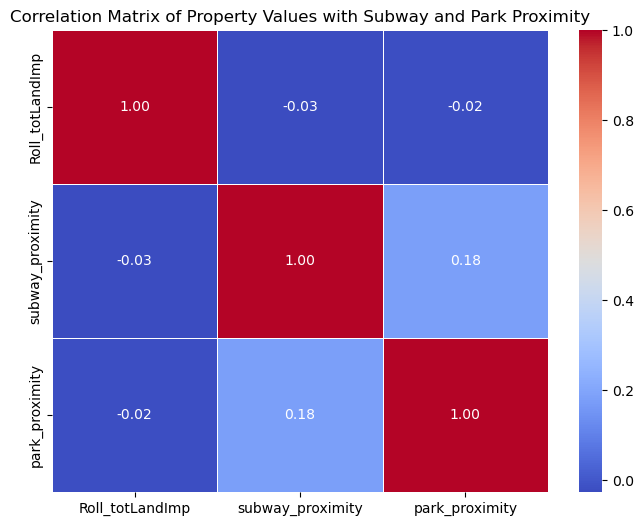

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation
correlation_data = df_property_latest_filtered[['Roll_totLandImp', 'subway_proximity', 'park_proximity']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Property Values with Subway and Park Proximity')
plt.show()


The correlation heatmap shows that both subway proximity and park proximity have very weak negative correlations with property values (Roll_totLandImp). These correlations suggest that proximity to subways and parks might not have a strong linear relationship with property values in this dataset.

By leaving out features like square footage, bedrooms, and bathrooms, we can focus solely on how subway proximity and park proximity influence property values. This will allow us to isolate their impact without interference from other more dominant features like property size or number of rooms.

Next Steps for Predictive Modeling:
Feature Selection: We will use only the subway_proximity and park_proximity columns as the input features.
Target Variable: We'll predict Roll_totLandImp (total property value).
Model Choice: We'll start with a Random Forest Regressor to capture non-linear relationships, since this model handles interactions between variables well.
Model Evaluation: After training, we will check feature importance and use SHAP or Partial Dependence Plots to visualize how proximity to subways and parks affects property values.

In [25]:
# Serialize the current dataset with proximity data
df_property_latest_filtered.to_pickle('property_with_proximity_numbers_serialized.pkl')
print("Dataset serialized successfully.")

Dataset serialized successfully.


In [27]:
# Remove the square footage and bedrooms/bathrooms columns
df_property_model = df_property_latest_filtered.drop(columns=['SQFTmain', 'Bedrooms', 'Bathrooms'])

# Verify that the columns were removed
print(df_property_model.columns)

# Next step: Proceed with the predictive model based on proximity to subways and parks


Index(['RollYear', 'Roll_LandValue', 'Roll_totLandImp', 'CENTER_LAT',
       'CENTER_LON', 'SitusZIP', 'SitusCity', 'UseType', 'UseCode',
       'distance_to_subway', 'distance_to_park', 'park_proximity',
       'subway_proximity'],
      dtype='object')
